## **Análise de variância (Anova)**

É baseado na análise da variância, daí o nome ANOVA (Analysis Of Variance)  
Este teste compara médias de três ou mais grupos independentes para determinar se há diferenças significativas entre eles.  
Ele assume que os dados seguem uma distribuição normal e que as variâncias entre os grupos são iguais (homocedasticidade).  
Se o resultado do teste ANOVA indica uma diferença significativa entre os grupos, pode-se concluir que pelo menos um dos grupos difere dos demais.  
No entanto, o teste ANOVA por si só não identifica quais grupos são diferentes, sendo necessário realizar testes post hoc para essa finalidade.

### **Data prep**

Organização do banco de dados de Dividend Yield por setor do IBOV, considerando o perído de tempo da comparação.

In [1]:
import pandas as pd
import yfinance as yf
from scipy import stats
import plotly.graph_objects as go
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Dicionário para armazenar os ativos e setores do IBOV

In [2]:
ativos_setor_IBOV = {
    "AZUL4": "Bens_industriais", "CCRO3": "Bens_industriais", "ECOR3": "Bens_industriais", "EMBR3": "Bens_industriais", "GOLL4": "Bens_industriais", "RAIL3": "Bens_industriais", "WEGE3": "Bens_industriais",
    "ALPA4": "Consumo_ciclico", "ARZZ3": "Consumo_ciclico", "CVCB3": "Consumo_ciclico", "CYRE3": "Consumo_ciclico", "EZTC3": "Consumo_ciclico", "LREN3": "Consumo_ciclico", "MGLU3": "Consumo_ciclico",
    "MRVE3": "Consumo_ciclico", "PETZ3": "Consumo_ciclico", "SOMA3": "Consumo_ciclico", "AMER3": "Consumo_ciclico", "ABEV3": "Consumo_nao_ciclico", "ASAI3": "Consumo_nao_ciclico", "BEEF3": "Consumo_nao_ciclico",
    "BRFS3": "Consumo_nao_ciclico", "CRFB3": "Consumo_nao_ciclico", "JBSS3": "Consumo_nao_ciclico", "MRFG3": "Consumo_nao_ciclico", "NTCO3": "Consumo_nao_ciclico", "PCAR3": "Consumo_nao_ciclico",
    "RAIZ4": "Consumo_nao_ciclico", "SLCE3": "Consumo_nao_ciclico", "SMTO3": "Consumo_nao_ciclico", "BBSE3": "Financeiro_e_outros", "B3SA3": "Financeiro_e_outros", "BBAS3": "Financeiro_e_outros",
    "BBDC3": "Financeiro_e_outros", "BBDC4": "Financeiro_e_outros", "BPAC11": "Financeiro_e_outros", "BPAN4": "Financeiro_e_outros", "CIEL3": "Financeiro_e_outros", "IGTI11": "Financeiro_e_outros",
    "ITSA4": "Financeiro_e_outros", "ITUB4": "Financeiro_e_outros", "MULT3": "Financeiro_e_outros", "SANB11": "Financeiro_e_outros", "BRAP4": "Mats_basicos", "BRKM5": "Mats_basicos", "CMIN3": "Mats_basicos",
    "CSNA3": "Mats_basicos", "DXCO3": "Mats_basicos", "GGBR4": "Mats_basicos", "GOAU4": "Mats_basicos", "KLBN11": "Mats_basicos", "SUZB3": "Mats_basicos", "USIM5": "Mats_basicos", "VALE3": "Mats_basicos",
    "CSAN3": "Petroleo_gas_biocombustiveis", "PETR3": "Petroleo_gas_biocombustiveis", "PETR4": "Petroleo_gas_biocombustiveis", "PRIO3": "Petroleo_gas_biocombustiveis", "RRRP3": "Petroleo_gas_biocombustiveis",
    "UGPA3": "Petroleo_gas_biocombustiveis", "VBBR3": "Petroleo_gas_biocombustiveis", "FLRY3": "Saude", "HAPV3": "Saude", "HYPE3": "Saude", "QUAL3": "Saude", "RADL3": "Saude", "RDOR3": "Saude", "CMIG4": "Utilidade_publica",
    "CPFE3": "Utilidade_publica", "CPLE6": "Utilidade_publica", "EGIE3": "Utilidade_publica", "ELET3": "Utilidade_publica", "ELET6": "Utilidade_publica", "ENEV3": "Utilidade_publica", "ENGI11": "Utilidade_publica",
    "EQTL3": "Utilidade_publica", "SBSP3": "Utilidade_publica", "TAEE11": "Utilidade_publica"
}

In [3]:
lista_ativos = list(ativos_setor_IBOV.keys())
lista_ativos_yf = [lista_ativos + '.SA' for lista_ativos in lista_ativos]

In [4]:
df_dados = yf.download(lista_ativos_yf, actions=True, start='2023-01-01', end='2024-07-31')[['Close', 'Dividends']]

[*********************100%%**********************]  78 of 78 completed


In [5]:
df_dados

Price         Close                                                            \
Ticker     ABEV3.SA ALPA4.SA AMER3.SA   ARZZ3.SA   ASAI3.SA AZUL4.SA B3SA3.SA   
Date                                                                            
2023-01-02    14.19    14.33     9.03  74.120003  18.990000    10.30    12.25   
2023-01-03    14.17    13.40     8.52  71.809998  18.610001    10.16    11.84   
2023-01-04    14.25    13.49     8.73  73.459999  19.080000    10.56    11.93   
2023-01-05    14.29    13.86     9.69  74.339996  18.980000    11.55    12.30   
2023-01-06    14.32    13.87    10.41  75.800003  19.040001    11.84    12.59   
...             ...      ...      ...        ...        ...      ...      ...   
2024-07-24    11.79     8.53     0.76  51.700001  10.000000     7.82    11.03   
2024-07-25    11.85     8.55     0.76  50.400002   9.900000     7.72    10.90   
2024-07-26    11.88     8.66     0.70  50.840000   9.840000     8.25    10.95   
2024-07-29    11.82     8.65     0.63  49.759998   9.550000     7.97    10.85   
2024-07-30    11.64     8.56     0.62  48.689999   9.440000     8.15    10.76   

Price                                    ... Dividends                     \
Ticker       BBAS3.SA BBDC3.SA BBDC4.SA  ...  SLCE3.SA  SMTO3.SA SOMA3.SA   
Date                                     ...                                
2023-01-02  16.629999    13.19    14.75  ...       0.0  0.000000      0.0   
2023-01-03  16.320000    12.55    14.00  ...       0.0  0.000000      0.0   
2023-01-04  16.530001    12.66    14.04  ...       0.0  0.000000      0.0   
2023-01-05  17.285000    13.07    14.65  ...       0.0  0.000000      0.0   
2023-01-06  17.525000    13.42    15.06  ...       0.0  0.000000      0.0   
...               ...      ...      ...  ...       ...       ...      ...   
2024-07-24  26.870001    11.37    12.55  ...       0.0  0.000000      0.0   
2024-07-25  26.889999    11.23    12.35  ...       0.0  0.000000      0.0   
2024-07-26  27.120001    11.33    12.45  ...       0.0  0.000000      0.0   
2024-07-29  27.160000    11.33    12.50  ...       0.0  0.450511      0.0   
2024-07-30  26.950001    11.24    12.40  ...       0.0  0.000000      0.0   

Price                                                                       
Ticker     SUZB3.SA TAEE11.SA UGPA3.SA USIM5.SA VALE3.SA VBBR3.SA WEGE3.SA  
Date                                                                        
2023-01-02      0.0       0.0      0.0      0.0      0.0      0.0      0.0  
2023-01-03      0.0       0.0      0.0      0.0      0.0      0.0      0.0  
2023-01-04      0.0       0.0      0.0      0.0      0.0      0.0      0.0  
2023-01-05      0.0       0.0      0.0      0.0      0.0      0.0      0.0  
2023-01-06      0.0       0.0      0.0      0.0      0.0      0.0      0.0  
...             ...       ...      ...      ...      ...      ...      ...  
2024-07-24      0.0       0.0      0.0      0.0      0.0      0.0      0.0  
2024-07-25      0.0       0.0      0.0      0.0      0.0      0.0      0.0  
2024-07-26      0.0       0.0      0.0      0.0      0.0      0.0      0.0  
2024-07-29      0.0       0.0      0.0      0.0      0.0      0.0      0.0  
2024-07-30      0.0       0.0      0.0      0.0      0.0      0.0      0.0  

[394 rows x 156 columns]

Cálculo da soma total dos dividendos pagos para cada ativo durante o período especificado.

In [6]:
soma_dividendos = df_dados['Dividends'].sum()
soma_dividendos

Ticker
ABEV3.SA    0.730200
ALPA4.SA    0.000000
AMER3.SA    0.000000
ARZZ3.SA    2.473210
ASAI3.SA    0.050019
              ...   
UGPA3.SA    0.750000
USIM5.SA    0.611825
VALE3.SA    7.250437
VBBR3.SA    1.905913
WEGE3.SA    1.033273
Length: 78, dtype: float64

Extrai o preço de fechamento mais recente para cada ativo no DataFrame.

In [7]:
close_ativo = df_dados['Close'].iloc[-1]
close_ativo

Ticker
ABEV3.SA    11.640000
ALPA4.SA     8.560000
AMER3.SA     0.620000
ARZZ3.SA    48.689999
ASAI3.SA     9.440000
              ...    
UGPA3.SA    22.459999
USIM5.SA     6.330000
VALE3.SA    60.220001
VBBR3.SA    23.190001
WEGE3.SA    45.860001
Name: 2024-07-30 00:00:00, Length: 78, dtype: float64

Cria um DataFrame contendo o Dividend Yield (%) para cada ativo

In [8]:
tabela_DY_2022 = pd.DataFrame(soma_dividendos/close_ativo*100, columns=['DY_%'])
tabela_DY_2022.sort_index()

,DY_%
Ticker,
ABEV3.SA,6.273196
ALPA4.SA,0.000000
AMER3.SA,0.000000
ARZZ3.SA,5.079503
ASAI3.SA,0.529862
...,...
UGPA3.SA,3.339270
USIM5.SA,9.665482
VALE3.SA,12.039915


Cria um DataFrame que mapeia cada ativo ao seu setor correspondente, conforme definido no dicionário 'ativos_setor_IBOV'.  
A coluna 'Ativo' é descartada após a criação do DataFrame.

In [9]:
df_ativos_setor = pd.DataFrame(data=ativos_setor_IBOV.items(), index=ativos_setor_IBOV.keys(), columns=['Ativo', 'Setor']).drop('Ativo', axis=1)
df_ativos_setor = df_ativos_setor.sort_index()
df_ativos_setor

,Setor
ABEV3,Consumo_nao_ciclico
ALPA4,Consumo_ciclico
AMER3,Consumo_ciclico
ARZZ3,Consumo_ciclico
ASAI3,Consumo_nao_ciclico
...,...
UGPA3,Petroleo_gas_biocombustiveis
USIM5,Mats_basicos
VALE3,Mats_basicos
VBBR3,Petroleo_gas_biocombustiveis


Retirando "S.A." dos tickers

In [10]:
nome_corrigido = dict(zip(lista_ativos_yf, lista_ativos))
print(nome_corrigido)

{'AZUL4.SA': 'AZUL4', 'CCRO3.SA': 'CCRO3', 'ECOR3.SA': 'ECOR3', 'EMBR3.SA': 'EMBR3', 'GOLL4.SA': 'GOLL4', 'RAIL3.SA': 'RAIL3', 'WEGE3.SA': 'WEGE3', 'ALPA4.SA': 'ALPA4', 'ARZZ3.SA': 'ARZZ3', 'CVCB3.SA': 'CVCB3', 'CYRE3.SA': 'CYRE3', 'EZTC3.SA': 'EZTC3', 'LREN3.SA': 'LREN3', 'MGLU3.SA': 'MGLU3', 'MRVE3.SA': 'MRVE3', 'PETZ3.SA': 'PETZ3', 'SOMA3.SA': 'SOMA3', 'AMER3.SA': 'AMER3', 'ABEV3.SA': 'ABEV3', 'ASAI3.SA': 'ASAI3', 'BEEF3.SA': 'BEEF3', 'BRFS3.SA': 'BRFS3', 'CRFB3.SA': 'CRFB3', 'JBSS3.SA': 'JBSS3', 'MRFG3.SA': 'MRFG3', 'NTCO3.SA': 'NTCO3', 'PCAR3.SA': 'PCAR3', 'RAIZ4.SA': 'RAIZ4', 'SLCE3.SA': 'SLCE3', 'SMTO3.SA': 'SMTO3', 'BBSE3.SA': 'BBSE3', 'B3SA3.SA': 'B3SA3', 'BBAS3.SA': 'BBAS3', 'BBDC3.SA': 'BBDC3', 'BBDC4.SA': 'BBDC4', 'BPAC11.SA': 'BPAC11', 'BPAN4.SA': 'BPAN4', 'CIEL3.SA': 'CIEL3', 'IGTI11.SA': 'IGTI11', 'ITSA4.SA': 'ITSA4', 'ITUB4.SA': 'ITUB4', 'MULT3.SA': 'MULT3', 'SANB11.SA': 'SANB11', 'BRAP4.SA': 'BRAP4', 'BRKM5.SA': 'BRKM5', 'CMIN3.SA': 'CMIN3', 'CSNA3.SA': 'CSNA3', 'DXCO3

Renomeia os índices de 'tabela_DY_2022' usando o dicionário nome_corrigido, para remover ".SA" dos tickers dos ativos.  
Combina df_ativos_setor e 'tabela_DY_2022' ao longo do eixo das colunas (axis=1), criando um novo DataFrame 'dados_setor_DY' que contém tanto os setores quanto os Dividend Yields dos ativos.  

In [11]:
tabela_DY_2022.rename(nome_corrigido, axis=0, inplace=True)
dados_setor_DY = pd.concat([df_ativos_setor, tabela_DY_2022], axis=1)
dados_setor_DY

,Setor,DY_%
ABEV3,Consumo_nao_ciclico,6.273196
ALPA4,Consumo_ciclico,0.000000
AMER3,Consumo_ciclico,0.000000
ARZZ3,Consumo_ciclico,5.079503
ASAI3,Consumo_nao_ciclico,0.529862
...,...,...
UGPA3,Petroleo_gas_biocombustiveis,3.339270
USIM5,Mats_basicos,9.665482
VALE3,Mats_basicos,12.039915
VBBR3,Petroleo_gas_biocombustiveis,8.218685


---
### **ANOVA (Análise de Variância)**

##### **Hipóteses**

* Hipótese H0 (nula): As médias de DY não diferem entre os setores
* Hipótese H1 (alternativa): As médias são diferentes estatisticamente

*Exemplo: Houve diferença significativa entre os setores do IBOV quanto à média de Dividend Yield (%) neste período?*

In [12]:
dados_setor_DY

,Setor,DY_%
ABEV3,Consumo_nao_ciclico,6.273196
ALPA4,Consumo_ciclico,0.000000
AMER3,Consumo_ciclico,0.000000
ARZZ3,Consumo_ciclico,5.079503
ASAI3,Consumo_nao_ciclico,0.529862
...,...,...
UGPA3,Petroleo_gas_biocombustiveis,3.339270
USIM5,Mats_basicos,9.665482
VALE3,Mats_basicos,12.039915
VBBR3,Petroleo_gas_biocombustiveis,8.218685


##### **Visualizando os dados das médias e desvios dos grupos**

In [13]:
pd.pivot_table(dados_setor_DY, values=['DY_%'], index=['Setor'], aggfunc=['mean','std'])

,mean,std
,DY_%,DY_%
Setor,,
Bens_industriais,1.309413,1.565357
Consumo_ciclico,2.310827,3.087506
Consumo_nao_ciclico,4.457222,4.165341
Financeiro_e_outros,9.529354,4.407469
Mats_basicos,10.962153,7.248022
Petroleo_gas_biocombustiveis,11.316508,12.907463
Saude,3.206164,2.327039
Utilidade_publica,7.291339,5.896924


In [14]:
tab_dinamica = pd.pivot_table(dados_setor_DY, values=['DY_%'], index=['Setor'], aggfunc=['mean','std']).droplevel(1, axis=1)
tab_dinamica

,mean,std
Setor,,
Bens_industriais,1.309413,1.565357
Consumo_ciclico,2.310827,3.087506
Consumo_nao_ciclico,4.457222,4.165341
Financeiro_e_outros,9.529354,4.407469
Mats_basicos,10.962153,7.248022
Petroleo_gas_biocombustiveis,11.316508,12.907463
Saude,3.206164,2.327039
Utilidade_publica,7.291339,5.896924


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(name='Média e Desvio', x=tab_dinamica.index, y=tab_dinamica['mean'],
      error_y=dict(type='data', array=tab_dinamica['std']),
      marker_color='#98ac4a', orientation='v'))

fig.update_layout(title_text='<b>Dividend Yield (média \xB1 desvio padrão da média) <br> entre os setores do IBOV', xaxis_title= '<b>Setores IBOV',
      yaxis_title= '<b>Dividend Yield (%)', template="none", margin=dict(l=75, r=20, t=75, b=75),
      paper_bgcolor="#f7f8fa", font=dict(family="Arial", size=12, color="black"), width=1200, height=600)

fig.show()

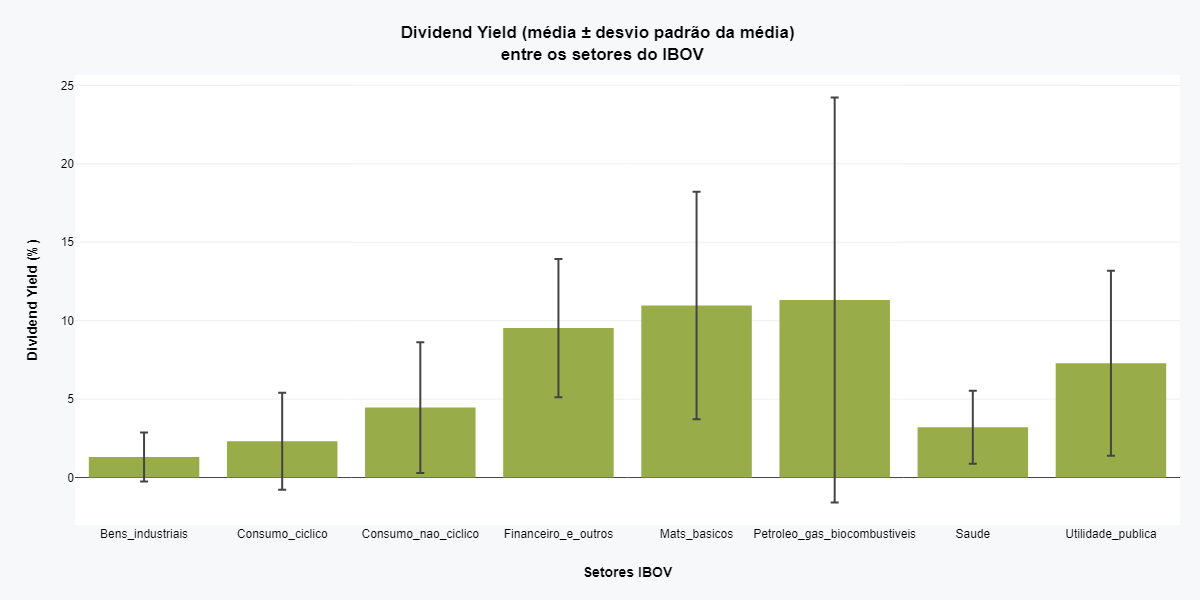

Separar os dados para fazer o teste de homogeneidade de variâncias

In [16]:
# dados_grupos = dados_setor_DY.groupby('Setor')['DY_%']
# dados_**Bens_industriais = dados_grupos.get_group("**Bens_industriais")
# dados_**Consumo_ciclico = dados_grupos.get_group("**Consumo_ciclico")
# dados_**Consumo_nao_ciclico = dados_grupos.get_group("**Consumo_nao_ciclico")
# dados_**Financeiro_e_outros = dados_grupos.get_group("**Financeiro_e_outros")
# dados_**Mats_basicos = dados_grupos.get_group("**Mats_basicos")
# dados_Petroleo_gas_biocombustiveis = dados_grupos.get_group("Petroleo_gas_biocombustiveis")
# dados_Saude = dados_grupos.get_group("Saude")
# dados_Utilidade_publica = dados_grupos.get_group("Utilidade_publica")

A função groupby divide um DataFrame em tuplas (group_name, DataFrame).  
Dado uma coluna de grupo 1 e uma coluna de valores 2, podemos usar uma compreensão de lista com um objeto groupby df.groupby(1),  
extrair apenas as colunas de valores df.groupb(1)[2] e então iterar através das tuplas do groupby mantendo os valores (col) e descartando os nomes (col_names)

In [17]:
values_per_group = [col.dropna() for col_name, col in dados_setor_DY.groupby('Setor')['DY_%']]

##### **Teste de Levene**

Para a ANOVA é uma premissa fundamental. Caso não seja verificada a homocedasticidade, pode ser necessário transformar os dados (ex., raiz quadrada ou log)

In [18]:
levene_test = stats.levene(*values_per_group)
print(f"Teste de Levene: estatística={levene_test.statistic}, p-valor={levene_test.pvalue}")

Teste de Levene: estatística=3.121438497645038, p-valor=0.006320721831286424


Verificar a variância de cada grupo

In [19]:
variancia_grupos = dados_setor_DY.groupby('Setor').var()
print(variancia_grupos)

                                    DY_%
Setor                                   
Bens_industriais                2.450343
Consumo_ciclico                 9.532694
Consumo_nao_ciclico            17.350067
Financeiro_e_outros            19.425782
Mats_basicos                   52.533828
Petroleo_gas_biocombustiveis  166.602591
Saude                           5.415110
Utilidade_publica              34.773709


Removendo o setor 'Petroleo_gas_biocombustiveis' para verificar variâncias homogêneas

In [20]:
dados_setor_DY_sem_petroleo = dados_setor_DY[dados_setor_DY.Setor != 'Petroleo_gas_biocombustiveis']
values_per_group_sem_petroleo = [col.dropna() for col_name, col in dados_setor_DY_sem_petroleo.groupby('Setor')['DY_%']]


Teste de Levene sem 'Petroleo_gas_biocombustiveis'

In [21]:
levene_test_sem_petroleo = stats.levene(*values_per_group_sem_petroleo)
print(f"Teste de Levene sem 'Petroleo_gas_biocombustiveis': estatística={levene_test_sem_petroleo.statistic}, p-valor={levene_test_sem_petroleo.pvalue}")


Teste de Levene sem 'Petroleo_gas_biocombustiveis': estatística=3.2615618842220866, p-valor=0.007339406612545286


##### **Teste ANOVA**

In [22]:
anova_result = stats.f_oneway(*values_per_group_sem_petroleo)
print(f"Resultado da ANOVA: estatística F={anova_result.statistic}, p-valor={anova_result.pvalue}")


Resultado da ANOVA: estatística F=6.171343293269228, p-valor=3.785375402406433e-05


##### **Post-hoc Tukey HSD (par a par)**

In [23]:
tukey = pairwise_tukeyhsd(endog=dados_setor_DY_sem_petroleo['DY_%'],
                          groups=dados_setor_DY_sem_petroleo['Setor'],
                          alpha=0.05)
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------------
   Bens_industriais     Consumo_ciclico   1.0014 0.9994  -5.9656  7.9685  False
   Bens_industriais Consumo_nao_ciclico   3.1478 0.8008  -3.7054  10.001  False
   Bens_industriais Financeiro_e_outros   8.2199 0.0077   1.4645 14.9754   True
   Bens_industriais        Mats_basicos   9.6527 0.0015   2.6857 16.6198   True
   Bens_industriais               Saude   1.8968 0.9909  -6.1201  9.9136  False
   Bens_industriais   Utilidade_publica   5.9819 0.1391  -0.9851  12.949  False
    Consumo_ciclico Consumo_nao_ciclico   2.1464 0.9299  -3.8686  8.1614  False
    Consumo_ciclico Financeiro_e_outros   7.2185 0.0073   1.3152 13.1218   True
    Consumo_ciclico        Mats_basicos   8.6513 0.0012    2.507 14.7957   True
    Consumo_ciclico               Saude 

**Bens_industriais vs Consumo_ciclico:**  
Não há diferença significativa entre as médias de DY desses setores (p > 0.05).

**Bens_industriais vs Consumo_nao_ciclico:**  
Não há diferença significativa entre as médias de DY desses setores (p > 0.05).

**Bens_industriais vs Financeiro_e_outros:**  
Há uma diferença significativa entre as médias de DY desses setores (p < 0.05).

**Bens_industriais vs Mats_basicos:**  
Há uma diferença significativa entre as médias de DY desses setores (p < 0.05).

**Bens_industriais vs Saude:**  
Não há diferença significativa entre as médias de DY desses setores (p > 0.05).

**Bens_industriais vs Utilidade_publica:**  
Não há diferença significativa entre as médias de DY desses setores (p > 0.05).

**Consumo_ciclico vs Consumo_nao_ciclico:**  
Não há diferença significativa entre as médias de DY desses setores (p > 0.05).

**Consumo_ciclico vs Financeiro_e_outros:**  
Há uma diferença significativa entre as médias de DY desses setores (p < 0.05).

**Consumo_ciclico vs Mats_basicos:**  
Não há diferença significativa entre as médias de DY desses setores (p > 0.05).

**Consumo_ciclico vs Saude:**  
Não há diferença significativa entre as médias de DY desses setores (p > 0.05).

**Consumo_ciclico vs Utilidade_publica:**  
Não há diferença significativa entre as médias de DY desses setores (p > 0.05).

**Consumo_nao_ciclico vs Financeiro_e_outros:**  
Há uma diferença significativa entre as médias de DY desses setores (p < 0.05).

**Consumo_nao_ciclico vs Mats_basicos:**  
Não há diferença significativa entre as médias de DY desses setores (p > 0.05).

**Consumo_nao_ciclico vs Saude:**  
Não há diferença significativa entre as médias de DY desses setores (p > 0.05).

**Consumo_nao_ciclico vs Utilidade_publica:**  
Não há diferença significativa entre as médias de DY desses setores (p > 0.05).

**Financeiro_e_outros vs Mats_basicos:**  
Não há diferença significativa entre as médias de DY desses setores (p > 0.05).

**Financeiro_e_outros vs Saude:**  
Há uma diferença significativa entre as médias de DY desses setores (p < 0.05).

**Financeiro_e_outros vs Utilidade_publica:**  
Há uma diferença significativa entre as médias de DY desses setores (p < 0.05).

**Mats_basicos vs Saude:**  
Há uma diferença significativa entre as médias de DY desses setores (p < 0.05).

**Mats_basicos vs Utilidade_publica:**  
Não há diferença significativa entre as médias de DY desses setores (p > 0.05).

**Saude vs Utilidade_publica:**  
Não há diferença significativa entre as médias de DY desses setores (p > 0.05).